# How do you measure justice

## Problem statement:
#### How do you measure justice? And how do you solve the problem of racism in policing? We look for factors that drive racial disparities in policing by analyzing census and police department deployment data. The ultimate goal is to inform police agencies where they can make improvements by identifying deployment areas where racial disparities exist and are not explainable by crime rates and poverty levels.

#### Our biggest challenge is automating the combination of police data, census-level data, and other socioeconomic factors. Shapefiles are unusual and messy -- which makes it difficult to, for instance, generate maps of police behavior with precinct boundary layers mixed with census layers. Police incident data are also very difficult to normalize and standardize across departments since there are no federal standards for data collection.




### Initial data exploration

Import required libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import os

%matplotlib inline

### Department Files
#### Information from different police deprtments is organised into files, displayed below

In [5]:
filepath  = r'C:\Users\Laura\OneDrive\Kaggle\data-science-for-good'
dept = []
for f in os.listdir(filepath):
    if f.startswith('Dept'):
        dept.append(f)
pprint(dept)

['Dept_11-00091',
 'Dept_23-00089',
 'Dept_35-00103',
 'Dept_37-00027',
 'Dept_37-00049',
 'Dept_49-00009']


#### Each department folder contains a shapefile folder and a data folder. I have chosen to initially explore the Austin police department data, as it is a city I know. 
Lets first look at the information provided by APD

In [6]:
APD_filepath = filepath + '\Dept_37-00027\\37-00027_ACS_data' 
APD_files = os.listdir(APD_filepath)
APD_files

['37-00027_ACS_education-attainment',
 '37-00027_ACS_education-attainment-over-25',
 '37-00027_ACS_owner-occupied-housing',
 '37-00027_ACS_poverty',
 '37-00027_ACS_race-sex-age']

APD has provided information regarding education level, over 25 eductation level, housing, poverty and race/sex/age


#### Exploration 1: APD information on poverty
Load data 

In [7]:
APD_pov = pd.read_csv(APD_filepath + '\\37-00027_ACS_poverty\ACS_16_5YR_S1701_with_ann.csv')
print(APD_pov.shape)
APD_pov.head()

(219, 369)


,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,...,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC01_EST_VC79,HC01_MOE_VC79,HC02_EST_VC79,HC02_MOE_VC79,HC03_EST_VC79,HC03_MOE_VC79
0,Id,Id2,Geography,Total; Estimate; Population for whom poverty s...,Total; Margin of Error; Population for whom po...,Below poverty level; Estimate; Population for ...,Below poverty level; Margin of Error; Populati...,Percent below poverty level; Estimate; Populat...,Percent below poverty level; Margin of Error; ...,Total; Estimate; AGE - Under 18 years,...,Below poverty level; Estimate; Worked less tha...,Below poverty level; Margin of Error; Worked l...,Percent below poverty level; Estimate; Worked ...,Percent below poverty level; Margin of Error; ...,Total; Estimate; Did not work,Total; Margin of Error; Did not work,Below poverty level; Estimate; Did not work,Below poverty level; Margin of Error; Did not ...,Percent below poverty level; Estimate; Did not...,Percent below poverty level; Margin of Error; ...
1,1400000US48453000101,48453000101,"Census Tract 1.01, Travis County, Texas",4270,276,270,104,6.3,2.4,821,...,127,66,30.6,16.4,420,99,117,65,27.9,14.2
2,1400000US48453000102,48453000102,"Census Tract 1.02, Travis County, Texas",2570,171,81,74,3.2,2.9,571,...,4,5,2.5,3.2,255,72,43,32,16.9,11.4
3,1400000US48453000203,48453000203,"Census Tract 2.03, Travis County, Texas",1258,174,423,142,33.6,9.1,49,...,169,73,49.9,13.2,207,96,160,90,77.3,15.7
4,1400000US48453000204,48453000204,"Census Tract 2.04, Travis County, Texas",3042,199,589,171,19.4,5.7,426,...,341,137,55.8,14.7,244,91,168,80,68.9,17.5


Each folder also contains a metadata file giving a brief description of the headings

In [8]:
APD_pov = APD_pov.drop([0])

In [9]:
APD_desc = pd.read_csv(APD_filepath + '\\37-00027_ACS_poverty\ACS_16_5YR_S1701_metadata.csv')
APD_desc.head()

,GEO.id,Id
0,GEO.id2,Id2
1,GEO.display-label,Geography
2,HC01_EST_VC01,Total; Estimate; Population for whom poverty s...
3,HC01_MOE_VC01,Total; Margin of Error; Population for whom po...
4,HC02_EST_VC01,Below poverty level; Estimate; Population for ...


Data appears to be grouped by Census Tract.
From census.gov: Census Tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity that are updated by local participants prior to each decennial census as part of the Census Bureau's Participant Statistical Areas Program.

Lets look at the population distribution across census tracts

In [10]:
APD_pov['HC01_EST_VC01'][1:].unique()

array(['2570', '1258', '3042', '4227', '3201', '5078', '3190', '3436',
       '4221', '1831', '3482', '3346', '4565', '798', '6589', '4415',
       '1121', '1679', '3670', '2215', '2426', '2121', '5369', '3669',
       '5571', '5025', '3576', '4031', '5586', '3790', '2965', '3208',
       '2731', '1570', '5353', '4077', '5048', '4369', '3291', '4994',
       '4285', '3703', '16', '4855', '3722', '4965', '4944', '4625',
       '14350', '5824', '5944', '4114', '3365', '7159', '4797', '3855',
       '10867', '6595', '4907', '3038', '6435', '2347', '3985', '5699',
       '6962', '6334', '4852', '2247', '3973', '1097', '4890', '6272',
       '4386', '2104', '17125', '7397', '6754', '14196', '8020', '7683',
       '5558', '12524', '4318', '3904', '7718', '8558', '6720', '3135',
       '5815', '4304', '6166', '4002', '2410', '5355', '5514', '6048',
       '4821', '5478', '7188', '7161', '3488', '7764', '6953', '3946',
       '5705', '4281', '7411', '6159', '6963', '7609', '1681', '2660',
    

##### There appears to be at least one row with an apparent total population of zero. Need to find and remove this row, or rows. 

In [11]:
no_pop = APD_pov[APD_pov['HC01_EST_VC01']=='0']
print(no_pop)

                   GEO.id      GEO.id2  \
218  1400000US48453980000  48453980000   

                           GEO.display-label HC01_EST_VC01 HC01_MOE_VC01  \
218  Census Tract 9800, Travis County, Texas             0            13   

    HC02_EST_VC01 HC02_MOE_VC01 HC03_EST_VC01 HC03_MOE_VC01 HC01_EST_VC03  \
218             0            13             -            **             0   

         ...      HC02_EST_VC78 HC02_MOE_VC78 HC03_EST_VC78 HC03_MOE_VC78  \
218      ...                  0            13             -            **   

    HC01_EST_VC79 HC01_MOE_VC79 HC02_EST_VC79 HC02_MOE_VC79 HC03_EST_VC79  \
218             0            13             0            13             -   

    HC03_MOE_VC79  
218            **  

[1 rows x 369 columns]


In [12]:
APD_pov = APD_pov.drop([218])
print(APD_pov.tail())

tot_pop = APD_pov['HC01_EST_VC01'][1:].astype(float)
pov_pop = APD_pov['HC02_EST_VC01'][1:].astype(float)


                   GEO.id      GEO.id2  \
213  1400000US48453002433  48453002433   
214  1400000US48453002434  48453002434   
215  1400000US48453002435  48453002435   
216  1400000US48453002436  48453002436   
217  1400000US48453002500  48453002500   

                            GEO.display-label HC01_EST_VC01 HC01_MOE_VC01  \
213  Census Tract 24.33, Travis County, Texas          7646           642   
214  Census Tract 24.34, Travis County, Texas          1833           163   
215  Census Tract 24.35, Travis County, Texas          7865           797   
216  Census Tract 24.36, Travis County, Texas          2758           387   
217     Census Tract 25, Travis County, Texas          5624           470   

    HC02_EST_VC01 HC02_MOE_VC01 HC03_EST_VC01 HC03_MOE_VC01 HC01_EST_VC03  \
213          1629           668          21.3           8.5          2895   
214           422           172          23.0           8.4           525   
215          1585           711          20.2        

<function matplotlib.pyplot.show>

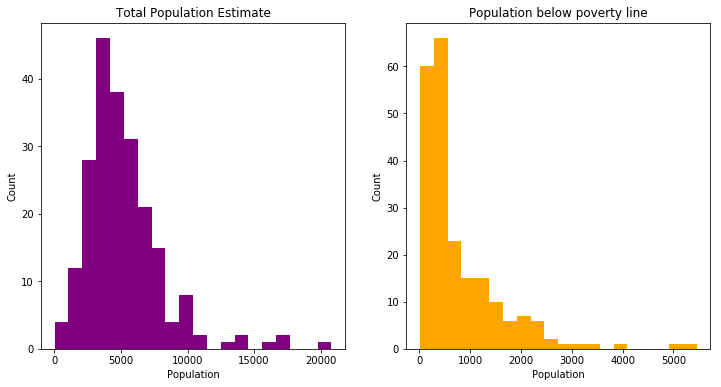

In [63]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1,2,1)
ax.hist(x = tot_pop, bins = 20, color = 'purple')
plt.ylabel('Count')
plt.xlabel("Population")
plt.title('Total Population Estimate')

ax = fig.add_subplot(1,2,2)
ax.hist(x = pov_pop, bins = 20, color = 'orange')
plt.ylabel('Count')
plt.xlabel("Population")
plt.title('Population below poverty line')

plt.show

Text(0.5,1,'Percent of cencus tract population living below poverty line')

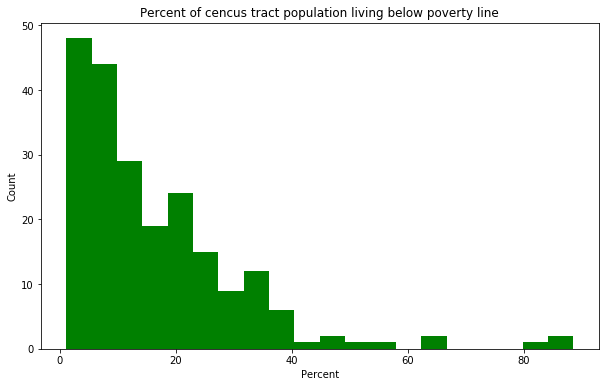

In [14]:
pov_per = APD_pov['HC03_EST_VC01'][1:].astype(float)

fig = plt.figure(figsize=(10, 6))

plt.hist(x = pov_per, bins = 20, color = 'green')
plt.ylabel('Count')
plt.xlabel("Percent")
plt.title('Percent of cencus tract population living below poverty line')


Whilst the majority of the census areas have less than 20% poverty, there are a few areas with over 50% of the population living in poverty. Lets look a little closer at the demographics for the population living below the poverty level. 

#### Age demographics

Switching to use plotly from now on. I think it looks nicer, and I need some more practice with it!


In [21]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
import plotly.figure_factory as ff
init_notebook_mode(connected=True)

In [48]:
box1 = go.Box(y = APD_pov['HC03_EST_VC03'])
box2 = go.Box(y = APD_pov['HC03_EST_VC07'])
box3 = go.Box(y = APD_pov['HC03_EST_VC11'])


titles = ['<18', '18-64','>65']

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = titles)

fig.append_trace(box1, 1, 1);
fig.append_trace(box2, 1, 2);
fig.append_trace(box3, 1, 3);


fig['layout']['yaxis1'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis2'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis3'].update(title = 'Percent', range=[0,100])


fig['layout'].update(height=600, title='Age-poverty distributions');
iplot(fig);

On first glance it seems that a higher percentage of under 18 year olds are living below the poverty level. This data could be skewed by household data (i.e. a household living below the poverty level could contain 1 or 2 adults and 3 or 4 (or more) children).

#### Gender demographics


In [50]:
box1 = go.Box(y = APD_pov['HC02_EST_VC14'])
box2 = go.Box(y = APD_pov['HC02_EST_VC15'])
box3 = go.Box(y = APD_pov['HC03_EST_VC14'])
box4 = go.Box(y = APD_pov['HC03_EST_VC15'])

titles = ['Total:Male', 'Total:Female', 'Percent:Male', 'Percent:Female']

fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles = titles)

fig.append_trace(box1, 1, 1);
fig.append_trace(box2, 1, 2);
fig.append_trace(box3, 2, 1);
fig.append_trace(box4, 2, 2);

fig['layout']['yaxis3'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis4'].update(title = 'Percent', range=[0,100])



fig['layout'].update(height=600, title='Gender-poverty distributions');
iplot(fig);

Poverty in Austin appears to equally effect male and female residents

#### Race demographics
As we have very little data for the "American Indian and Alaska Native" and "Native Hawaiian and Other Pacific Islander" we will exclude them from the analysis. 

In [54]:
box1 = go.Box(y = APD_pov['HC03_EST_VC18'])
box2 = go.Box(y = APD_pov['HC03_EST_VC19'])
box3 = go.Box(y = APD_pov['HC03_EST_VC26'])
box4 = go.Box(y = APD_pov['HC03_EST_VC21'])

titles = ['Percent: White', 'Percent: Black or African American', 'Percent: Hispanic or Latino', 'Percent: Asian']

fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles = titles)

fig.append_trace(box1, 1, 1);
fig.append_trace(box2, 1, 2);
fig.append_trace(box3, 2, 1);
fig.append_trace(box4, 2, 2);

fig['layout']['yaxis1'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis2'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis3'].update(title = 'Percent', range=[0,100])
fig['layout']['yaxis4'].update(title = 'Percent', range=[0,100])

fig['layout'].update(height=600, title='Race-poverty distributions');
iplot(fig);

From this dataset it appears that poverty may disproportionately effect Black or African American and Hispanic or Latino resident of Austin. 
#### Median values:
- White: 11.1%
- Black or African American: 13.4%
- Hispanic or Latino: 18.1%
- Asian: 4%

We can use some statistics to see if these median values are significantly different

In [59]:
from scipy import stats

a1 = APD_pov['HC03_EST_VC18']
a2 = APD_pov['HC03_EST_VC19']
a3 = APD_pov['HC03_EST_VC26']
a4 = APD_pov['HC03_EST_VC21']

stats.kruskal(a1, a2, a3, a4)


C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



KruskalResult(statistic=79.24534719348387, pvalue=4.455522789498427e-17)

#### The resulting p value from the Kruskal-Wallace test shows a very high level of significance. Indicating that in our population sample different races are disproportionately effected by poverty. 